In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
import seaborn as sns

from scipy.stats import ttest_ind,kruskal, boschloo_exact, fisher_exact,ttest_rel,mannwhitneyu,anderson_ksamp,wilcoxon,normaltest,binom_test,ttest_1samp

In [2]:
def format_df(df):
    

    df_overall=df[['dataset','overall']]
    df_overall['Type']='overall'
    df_overall.rename(columns={'overall':'percent'},inplace=True)

    df_cont=df[['dataset','contentious']]
    df_cont['Type']='Contentious'
    df_cont.rename(columns={'contentious':'percent'},inplace=True)

    df_uncont=df[['dataset','uncontentious']]
    df_uncont['Type']='Uncontentious'
    df_uncont.rename(columns={'uncontentious':'percent'},inplace=True)

    df_all=pd.concat([df_overall, df_cont, df_uncont])
    df_all.loc[df_all.dataset=='dress','dataset']='Clothing'
    df_all.loc[df_all.dataset=='meal','dataset']='Meal'
    df_all.loc[df_all.dataset=='pet','dataset']='Pet'
    df_all.loc[df_all.dataset=='toxicity','dataset']='Comment'
    
    return df_all


In [3]:
def adjust_lightness(color, amount=1.7):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

## Getting crossdataset comparison plots

In [4]:
import scipy

def mean_confidence_interval(x, confidence=0.95, n_samp=500):
    m=np.mean(x)
    values = [np.random.choice(x,size=len(x),replace=True).mean() for i in range(n_samp)] 
    h1, h2 = np.percentile(values,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 
    h=h2-m
    return m, h, m-h1, h2-m


/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_45042/1753034054.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_descr = df_descr.groupby('imgname').mean().reset_index()
/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_45042/1753034054.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_norm = df_norm.groupby('imgname').mean().reset_index()
/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_45042/1753034054.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either sp

../../../data_dir/dress/{}_labels.csv
../../../data_dir/meal/{}_labels.csv
../../../data_dir/pet/{}_labels.csv
../../../data_dir/toxicity/{}_labels.csv


/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_45042/3882284336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overall['Type']='overall'
/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_45042/3882284336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_overall.rename(columns={'overall':'percent'},inplace=True)
/var/folders/3j/h2m619j17dl6rdy721s2phbm0000gn/T/ipykernel_45042/3882284336.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

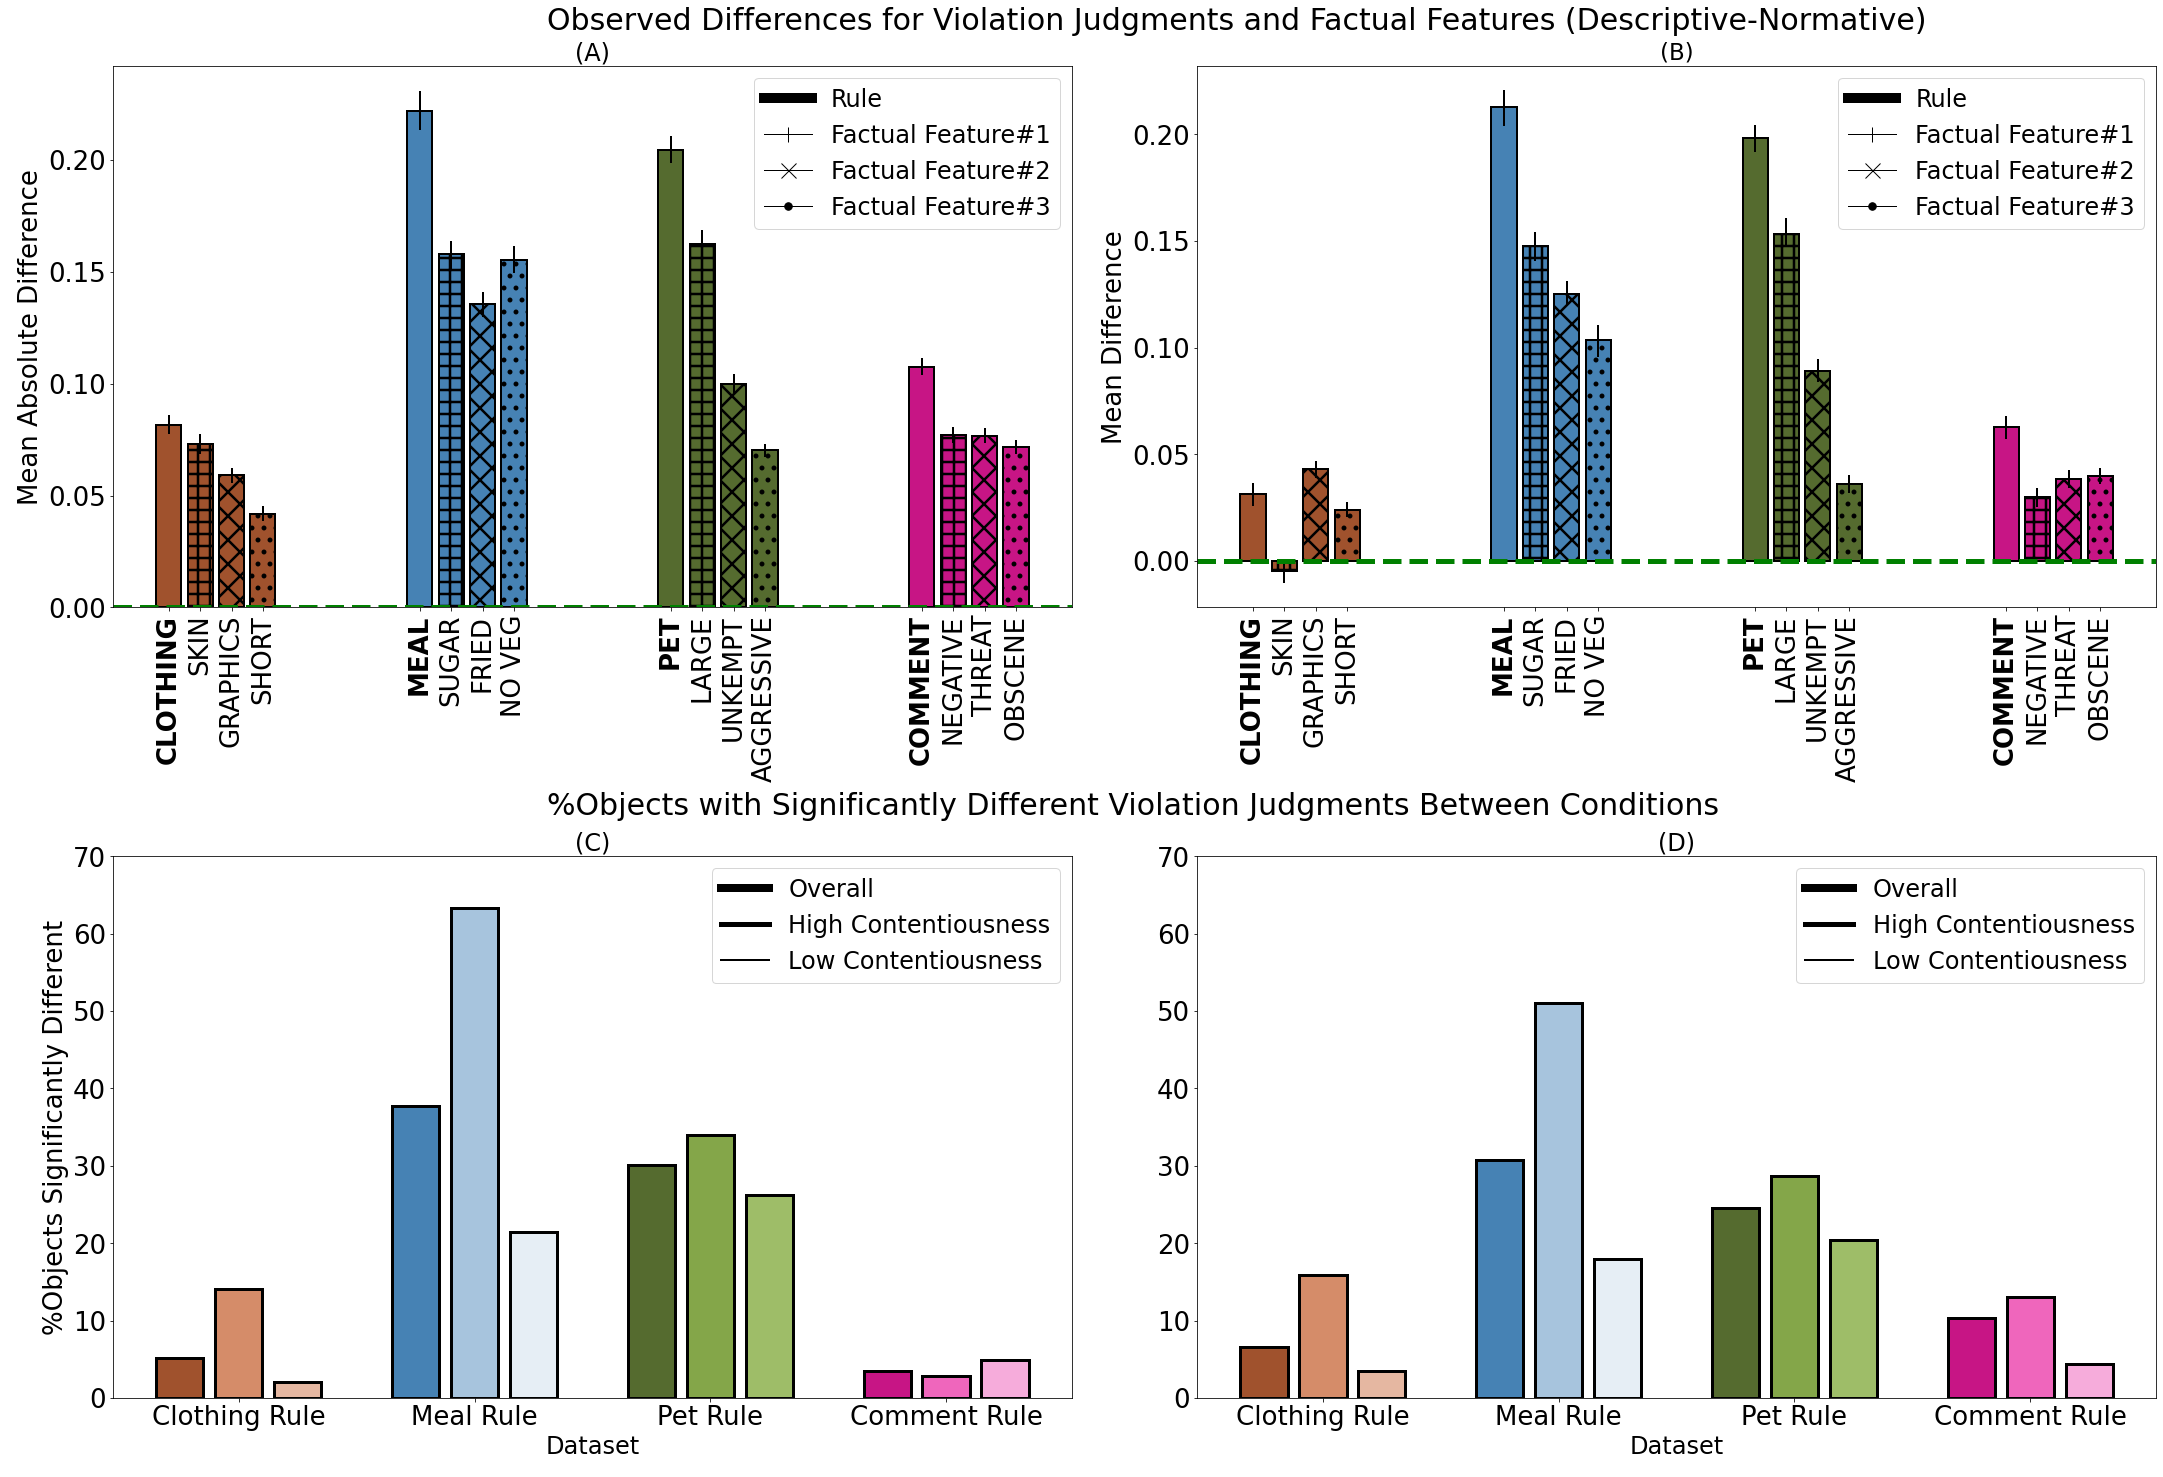

In [5]:
import matplotlib.markers as mmark
fig, ax = plt.subplots(2,2,figsize=(30,20))

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=2)
# for row, subfig in enumerate(subfigs):
#     if row==0:

df_all = []
df_all_cont = []
df_all_uncont = []
dnum=0
for dataset in ['../../../data_dir/dress/{}_labels.csv',
                '../../../data_dir/meal/{}_labels.csv',
                '../../../data_dir/pet/{}_labels.csv',
                '../../../data_dir/toxicity/{}_labels.csv']:
    df_descr = pd.read_csv(dataset.format('descriptive'))
    df_descr = df_descr.groupby('imgname').mean().reset_index()
    
    df_norm = pd.read_csv(dataset.format('normative'))
    df_norm = df_norm.groupby('imgname').mean().reset_index()
    df_descr = df_descr.sort_values('imgname')
    df_norm = df_norm.sort_values('imgname')
    
    assert (df_norm.imgname.values==df_descr.imgname.values).all()
    for i in range(4):
        df_norm['diff{}'.format(i)] = df_descr['descriptive{}'.format(i)
                                    ] - df_norm['normative{}'.format(i)]
    df_norm['dataset'] = dataset
    df_norm['dataset_num'] = dnum
    dnum+=1

    print(dataset)
    df_cont = df_norm.loc[(df_norm['normative0']>=0.2) &
           (df_norm['normative0']<=0.8)]
    df_uncont = df_norm.loc[(df_norm['normative0']<0.2) |
           (df_norm['normative0'] > 0.8)]

    df_all.append(df_norm)
    df_all_cont.append(df_cont)
    df_all_uncont.append(df_uncont)
df_all = pd.concat(df_all).reset_index()
df_all_cont = pd.concat(df_all_cont).reset_index()
df_all_uncont = pd.concat(df_all_uncont).reset_index()
    
import matplotlib as mpl

mpl.rcParams['hatch.linewidth'] = 2.5
means = []
hs=[]
abs_means = []
abs_hs = []
hs1=[]
hs2=[]
abs_hs1=[]
abs_hs2=[]
markers=['','o','*','^']
colors_all=['sienna','steelblue','darkolivegreen','mediumvioletred']
patterns = ["*", "+" ,  "x" , "." ]

lim = []
overallpos = []
xticks = []
allx = []
for i in np.arange(0,32,8):
    lim.extend([i+1,i+2,i+3])
    overallpos.append(i)
    xticks.append(i+2.5)
    allx.extend([i,i+1,i+2,i+3])
    
    
    
# all labels
curr_colors=[]
total_count=0
for dataset_num in [0,1,2,3]:
    df = df_all[df_all.dataset_num==dataset_num]
    for num in [1,2,3]:
        m, h, h1, h2 = mean_confidence_interval(df['diff{}'.format(num)].values)
        abs_m, abs_h, abs_h1, abs_h2 = mean_confidence_interval(np.abs(df['diff{}'.format(num)].values))
        means.append(m)
        hs.append(h)
        hs1.append(h1)
        hs2.append(h2)
        abs_means.append(abs_m)
        abs_hs.append(abs_h)
        abs_hs1.append(abs_h1)
        abs_hs2.append(abs_h2)
        curr_colors.append(colors_all[dataset_num])
        ax[0][0].bar(lim[total_count],abs_m,linewidth=2,color=colors_all[dataset_num],
                  hatch=patterns[num],
                  edgecolor='black',
                  )
        ax[0][0].errorbar(lim[total_count],abs_m, xerr=0, yerr=np.array([abs_h1, abs_h2]).reshape(2,1),
                       linestyle='',linewidth=2,color='black')
        ax[0][1].bar(lim[total_count],m,linewidth=2,color=colors_all[dataset_num],
                  hatch=patterns[num],
                 edgecolor='black',)
        ax[0][1].errorbar(lim[total_count],m, xerr=0, yerr=np.array([h1, h2]).reshape(2,1),
                       linestyle='',linewidth=2,color='black')
        total_count+=1



means = []
hs=[]
abs_means = []
abs_hs = []
hs1=[]
hs2=[]
abs_hs1=[]
abs_hs2=[]
curr_colors=[]
for dataset_num in [0,1,2,3]:
    df = df_all[df_all.dataset_num==dataset_num]
    for num in [0]:
        m, h, h1, h2 = mean_confidence_interval(df['diff{}'.format(num)].values)
        abs_m, abs_h, abs_h1, abs_h2 = mean_confidence_interval(np.abs(df['diff{}'.format(num)].values))
        means.append(m)
        hs.append(h)
        hs1.append(h1)
        hs2.append(h2)
        abs_means.append(abs_m)
        abs_hs.append(abs_h)
        abs_hs1.append(abs_h1)
        abs_hs2.append(abs_h2)
        curr_colors.append(colors_all[dataset_num])


ax[0][0].bar(overallpos, abs_means,linewidth=2,color=curr_colors,edgecolor='black')
ax[0][0].errorbar(overallpos, abs_means, xerr=0, yerr=np.vstack([abs_hs1,abs_hs2]), 
               linestyle='',linewidth=2,color='black')
ax[0][1].bar(overallpos,means,linewidth=2,color=curr_colors,edgecolor='black')
ax[0][1].errorbar(overallpos,means, xerr=0, yerr=np.vstack([hs1,hs2]), 
               linestyle='',linewidth=2,color='black')




ax[0][0].set_xticks(allx)
# bold the rules
total_len=len(['CLOTHING RULE','SKIN','GRAPHICS','SHORT',
               'MEAL RULE','SUGAR','FRIED','NO VEG',
               'PET RULE','LARGE','UNKEMPT','AGGRESSIVE',
               'COMMENT RULE','NEGATIVE','THREAT','OBSCENE'])-1

ax[0][0].set_xticklabels(['CLOTHING','SKIN','GRAPHICS','SHORT',
               'MEAL','SUGAR','FRIED','NO VEG',
               'PET','LARGE','UNKEMPT','AGGRESSIVE',
               'COMMENT','NEGATIVE','THREAT','OBSCENE'],size=26, rotation=90,alpha=1)
ax[0][0].get_xticklabels()[0].set_weight("bold")
ax[0][0].get_xticklabels()[4].set_weight("bold")
ax[0][0].get_xticklabels()[8].set_weight("bold")
ax[0][0].get_xticklabels()[12].set_weight("bold")
# ax[0].get_xticklabels()[0].set_color("red")
# ax[0].get_xticklabels()[4].set_color("red")
# ax[0].get_xticklabels()[8].set_color("red")
# ax[0].get_xticklabels()[12].set_color("red")




ax[0][1].set_xticks(allx)
# bold the rules
ax[0][1].set_xticklabels(['CLOTHING','SKIN','GRAPHICS','SHORT',
               'MEAL','SUGAR','FRIED','NO VEG',
               'PET','LARGE','UNKEMPT','AGGRESSIVE',
               'COMMENT','NEGATIVE','THREAT','OBSCENE'],size=26, rotation=90,alpha=1)

ax[0][1].get_xticklabels()[0].set_weight("bold")
ax[0][1].get_xticklabels()[4].set_weight("bold")
ax[0][1].get_xticklabels()[8].set_weight("bold")
ax[0][1].get_xticklabels()[12].set_weight("bold")
# ax[1].get_xticklabels()[0].set_color("red")
# ax[1].get_xticklabels()[4].set_color("red")
# ax[1].get_xticklabels()[8].set_color("red")
# ax[1].get_xticklabels()[12].set_color("red")


# setting titles
# text = "Mean Absolute Difference in Judgement Label (Descriptive - Normative)"
# ax[0].set_title('\n'.join(wrap(text, 50
#                           )), fontsize=24)



# labels
ax[0][0].tick_params(axis = 'both', which = 'major', labelsize = 26)
ax[0][0].set_ylabel('Mean Absolute Difference',fontsize=26)
ax[0][1].tick_params(axis = 'both', which = 'major', labelsize = 26)
ax[0][1].set_ylabel('Mean Difference',fontsize=26)

# ax.axvspan(6, 13, color='y', alpha=0.1, lw=0)
# ax.axvspan(22,29, color='y', alpha=0.1, lw=0)
# ax[0].set_ylim([-0.06,0.30])


ax[0][0].axhline(y=0, color='green', linestyle='--',linewidth=5)
ax[0][1].axhline(y=0, color='green', linestyle='--',linewidth=5)


from matplotlib.lines import Line2D
# patterns = ["*", "/" ,  "x" , "." ]

custom_lines = [Line2D([0], [0], color='black',
                          markerfacecolor='black', markersize=15, linewidth=10),
                Line2D([0], [0], marker="+",color='black', 
                          markerfacecolor='black', markersize=15,linewidth=1),
                Line2D([0], [0], marker='x', color='black', 
                          markerfacecolor='black', markersize=15,linewidth=1),
                Line2D([0], [0], marker='.', color='black', 
                          markerfacecolor='black', markersize=15,linewidth=1),


#                 mmark.MarkerStyle('/'),
#                 mmark.MarkerStyle('x'),
#                 mmark.MarkerStyle('.')
#                 Line2D([0], [0], color='lightgray',
#                           markerfacecolor='lightgray', markersize=15),
                ]

ax[0][0].legend(custom_lines, ['Rule', 'Factual Feature#1',
                                 'Factual Feature#2',
                                 'Factual Feature#3'],loc='upper right', fontsize=24)
ax[0][1].legend(custom_lines, ['Rule', 'Factual Feature#1',
                                 'Factual Feature#2',
                                 'Factual Feature#3'],loc='upper right', fontsize=24)

ax[0][0].set_title('(A)', fontsize=24)
ax[0][1].set_title('(B)', fontsize=23)

# plt.tight_layout()


# fig, ax = plt.subplots(1,2,figsize=(24,9))
colors_all=['sienna','steelblue','darkolivegreen','mediumvioletred']
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black',
                          markerfacecolor='black', markersize=15, linewidth=8),
                Line2D([0], [0], color='black',
                          markerfacecolor='black', markersize=15, linewidth=5),
                Line2D([0], [0], color='black',
                          markerfacecolor='black', markersize=15, linewidth=2)]


df=pd.read_csv('../../../all_datasets_boschloo_descriptive_normative_test.csv')
df_all=format_df(df)
# ax.set_xticklabels(["on/short","on/long",'off/short','off/long'])
# sns.barplot(x="dataset", y="percent", hue="Type", data=df_all, palette='Greys_r',ax=ax[0])
ax[1][0].bar(x=[1,5,9,13]
          ,height=df_all[df_all.Type=='Contentious']['percent'].values*100, 
          color=[adjust_lightness(color_,1.55) for color_ in colors_all], linewidth=3, edgecolor='black')
ax[1][0].bar(x=[0,4,8,12]
          , height=df_all[df_all.Type=='overall']['percent'].values*100, color=colors_all, linewidth=3, edgecolor='black')
ax[1][0].bar(x=[2,6,10,14]
          ,height=df_all[df_all.Type=='Uncontentious']['percent'].values*100, 
          color=[adjust_lightness(color_,1.9) for color_ in colors_all], linewidth=3, edgecolor='black')

# ax[0].bar(x=df_all[df_all.Type=='uncontentious']['dataset'].values
#           , height=df_all[df_all.Type=='uncontentious']['percent'].values, color=colors_all)

ax[1][0].set_xticks([1,5,9,13])
ax[1][0].set_xticklabels(['Clothing Rule','Meal Rule','Pet Rule','Comment Rule'])
ax[1][0].tick_params(axis = 'both', which = 'major', labelsize = 26)
ax[1][0].set_ylabel('%Objects Significantly Different',fontsize=26)
ax[1][0].legend(custom_lines,['Overall','High Contentiousness','Low Contentiousness'],fontsize=24)
ax[1][0].set_xlabel('Dataset',fontsize=24)
ax[1][0].set_title('(C)', fontsize=24)
ax[1][0].set_ylim([0,70])


df=pd.read_csv('../../../all_datasets_boschloo_context_normative_test.csv')
df_all=format_df(df)
ax[1][1].bar(x=[0,4,8,12]
          , height=df_all[df_all.Type=='overall']['percent'].values*100, color=colors_all, linewidth=3, edgecolor='black')
ax[1][1].bar(x=[1,5,9,13]
          ,height=df_all[df_all.Type=='Contentious']['percent'].values*100, 
          color=[adjust_lightness(color_,1.55) for color_ in colors_all], linewidth=3, edgecolor='black')
ax[1][1].bar(x=[2,6,10,14]
          ,height=df_all[df_all.Type=='Uncontentious']['percent'].values*100, 
          color=[adjust_lightness(color_,1.9) for color_ in colors_all], linewidth=3, edgecolor='black')
ax[1][1].set_xticks([1,5,9,13])
ax[1][1].set_xticklabels(['Clothing Rule','Meal Rule','Pet Rule','Comment Rule'])

ax[1][1].tick_params(axis = 'both', which = 'major', labelsize = 26)
# ax[1].set_ylabel('%Examples Significantly Different',fontsize=22)
ax[1][1].legend(custom_lines,['Overall','High Contentiousness','Low Contentiousness'],fontsize=24)
ax[1][1].set_xlabel('Dataset',fontsize=24)
ax[1][1].set_title('(D)', fontsize=24)
ax[1][1].set_ylim([0,70])

plt.figtext(0.25,1,'Observed Differences for Violation Judgments and Factual Features (Descriptive-Normative)', fontsize=30)

#     else:
plt.figtext(0.25,0.455,'%Objects with Significantly Different Violation Judgments Between Conditions',fontsize=30)


# shift subplots down:
# st.set_y(1.05)
plt.tight_layout(h_pad=5, w_pad=3)
# plt.subplots_adjust(
#                     wspace=0.2, 
#                     hspace=0.35)


plt.savefig('../Figure3.pdf',dpi=600, bbox_inches="tight")